In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
city_data = []

In [7]:
# import the requests library
import requests

# import the API key 
from config import weather_api_keys

# starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | jaguaruana
Processing Record 3 of Set 1 | taiyuan
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | mairwa
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | amapa
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | sola
Processing Record 18 of Set 1 | beyneu
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Reco

Processing Record 37 of Set 4 | baykit
Processing Record 38 of Set 4 | siguiri
Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | metro
Processing Record 41 of Set 4 | maceio
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | pangody
Processing Record 46 of Set 4 | yantal
Processing Record 47 of Set 4 | burnie
Processing Record 48 of Set 4 | the valley
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | naron
Processing Record 2 of Set 5 | hirara
Processing Record 3 of Set 5 | sumbuya
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | antalaha
Processing Record 6 of Set 5 | araouane
Processing Record 7 of Set 5 | jeannette
Processing Record 8 of Set 5 | east london
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 |

Processing Record 29 of Set 8 | faya
Processing Record 30 of Set 8 | kismayo
Processing Record 31 of Set 8 | zyryanka
Processing Record 32 of Set 8 | gayeri
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | qui nhon
Processing Record 36 of Set 8 | nikolskoye
Processing Record 37 of Set 8 | buinsk
Processing Record 38 of Set 8 | boralday
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | ribeira grande
Processing Record 41 of Set 8 | saint-georges
Processing Record 42 of Set 8 | kampong chhnang
Processing Record 43 of Set 8 | nova olimpia
Processing Record 44 of Set 8 | norman wells
Processing Record 45 of Set 8 | salaga
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | san cristobal
Processing Record 48 of Set 8 | avera
Processing Record 49 of Set 8 | kapit
Processing Record 50 of Set 8 | kokstad
Processing Record 1 of Set 9 | vila franca do campo
Proce

Processing Record 19 of Set 12 | mehamn
Processing Record 20 of Set 12 | marcona
City not found. Skipping...
Processing Record 21 of Set 12 | addi ugri
City not found. Skipping...
Processing Record 22 of Set 12 | harper
Processing Record 23 of Set 12 | koumac
Processing Record 24 of Set 12 | ahipara
Processing Record 25 of Set 12 | ancud
Processing Record 26 of Set 12 | egvekinot
Processing Record 27 of Set 12 | olinda
Processing Record 28 of Set 12 | muttupet
Processing Record 29 of Set 12 | kachiry
Processing Record 30 of Set 12 | karratha
Processing Record 31 of Set 12 | haines junction
Processing Record 32 of Set 12 | champerico
Processing Record 33 of Set 12 | evensk
Processing Record 34 of Set 12 | karlstad
Processing Record 35 of Set 12 | batagay
Processing Record 36 of Set 12 | tessalit
Processing Record 37 of Set 12 | alac
Processing Record 38 of Set 12 | ruwi
Processing Record 39 of Set 12 | shilovo
Processing Record 40 of Set 12 | perivolion
Processing Record 41 of Set 12 | 

In [9]:
len(city_data)

573

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,70.00,77,0,10.36,ZA,2021-03-24 22:08:20
1,Jaguaruana,-4.8339,-37.7811,75.56,90,50,5.70,BR,2021-03-24 22:08:21
2,Taiyuan,37.8694,112.5603,37.40,56,0,2.24,CN,2021-03-24 22:08:21
3,Vaini,-21.2000,-175.2000,78.80,89,90,14.97,TO,2021-03-24 22:08:21
4,Hobart,-42.8794,147.3294,62.01,94,75,10.18,AU,2021-03-24 22:08:01
5,Mairwa,26.2333,84.1500,74.05,19,14,8.37,IN,2021-03-24 22:08:22
6,Ushuaia,-54.8000,-68.3000,42.80,75,75,39.12,AR,2021-03-24 22:08:22
7,Rikitea,-23.1203,-134.9692,79.59,67,0,13.00,PF,2021-03-24 22:08:22
8,Meulaboh,4.1363,96.1285,74.75,87,100,3.18,ID,2021-03-24 22:08:23
9,Coquimbo,-29.9533,-71.3436,64.40,68,0,11.50,CL,2021-03-24 22:04:05


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-03-24 22:08:20,-33.9258,18.4232,70.00,77,0,10.36
1,Jaguaruana,BR,2021-03-24 22:08:21,-4.8339,-37.7811,75.56,90,50,5.70
2,Taiyuan,CN,2021-03-24 22:08:21,37.8694,112.5603,37.40,56,0,2.24
3,Vaini,TO,2021-03-24 22:08:21,-21.2000,-175.2000,78.80,89,90,14.97
4,Hobart,AU,2021-03-24 22:08:01,-42.8794,147.3294,62.01,94,75,10.18
5,Mairwa,IN,2021-03-24 22:08:22,26.2333,84.1500,74.05,19,14,8.37
6,Ushuaia,AR,2021-03-24 22:08:22,-54.8000,-68.3000,42.80,75,75,39.12
7,Rikitea,PF,2021-03-24 22:08:22,-23.1203,-134.9692,79.59,67,0,13.00
8,Meulaboh,ID,2021-03-24 22:08:23,4.1363,96.1285,74.75,87,100,3.18
9,Coquimbo,CL,2021-03-24 22:04:05,-29.9533,-71.3436,64.40,68,0,11.50


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

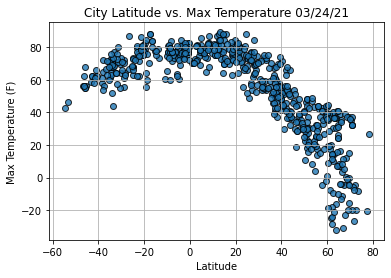

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

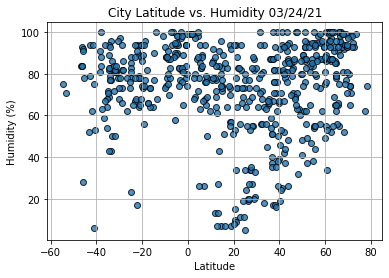

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

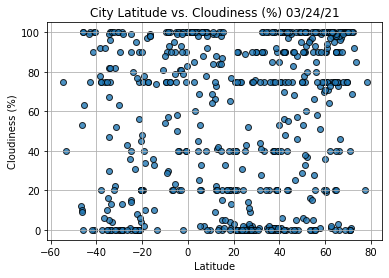

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

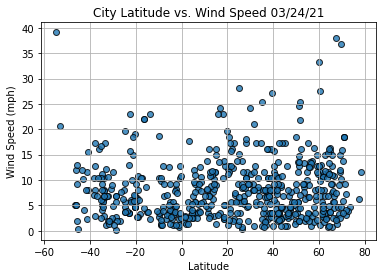

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                         Sola
Country                        VU
Date          2021-03-24 22:08:24
Lat                      -13.8833
Lng                        167.55
Max Temp                     78.8
Humidity                      100
Cloudiness                     74
Wind Speed                    2.3
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
568    False
569     True
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Taiyuan,CN,2021-03-24 22:08:21,37.8694,112.5603,37.40,56,0,2.24
5,Mairwa,IN,2021-03-24 22:08:22,26.2333,84.1500,74.05,19,14,8.37
8,Meulaboh,ID,2021-03-24 22:08:23,4.1363,96.1285,74.75,87,100,3.18
10,Amapa,BR,2021-03-24 22:08:23,1.0000,-52.0000,70.12,99,100,1.74
11,Khatanga,RU,2021-03-24 22:08:23,71.9667,102.5000,-4.61,95,100,3.06


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

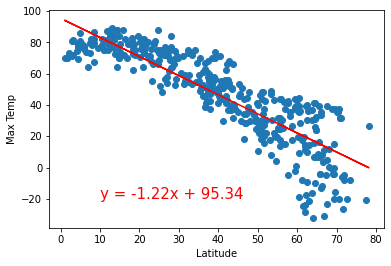

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

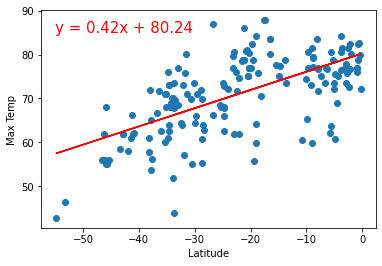

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,85))

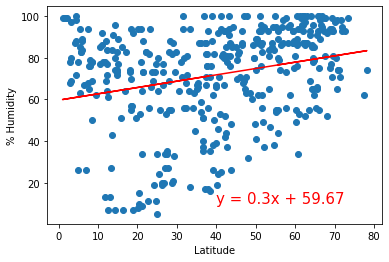

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

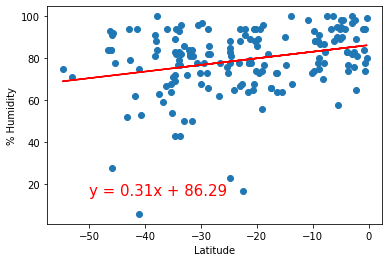

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

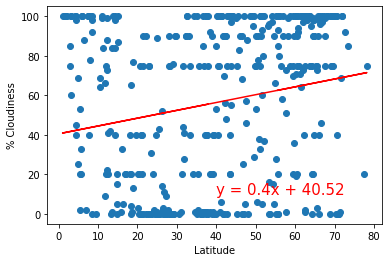

In [32]:
# Linear regression on the Northern Hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

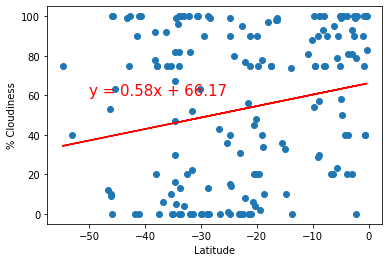

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

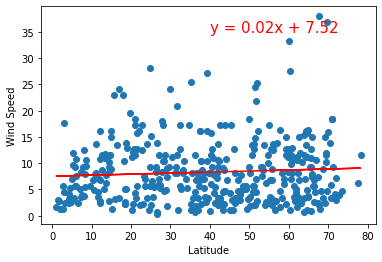

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

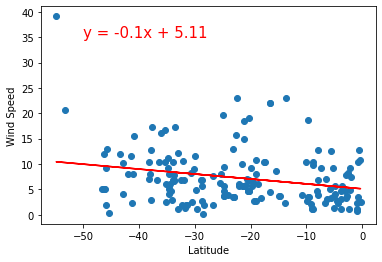

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))